# Starting example: the unicycle

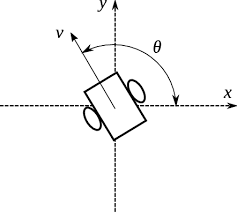

An unicycle is an abstract model of a car that can only drive forward but can turn on the spot.

We define here a optimal-control problem for the classical unicycle model. For the cost, we make the sum between the distance to the origin and the system speed, which means: drive toward the origin, but not too fast.


**Issue on Ubuntu 16.04**

You need to upgrate the matplotlib library, please do:
 - pip install --upgrade --user pip
 - pip install --upgrade --user matplotlib


In [ ]:
import numpy as np
x = np.random.rand(3)
u = np.random.rand(2)

v,w = u
c,s = np.cos(x[2]),np.sin(x[2])
dt = 1e-2

dx = np.array([ v*c, v*s, w ])
xnext = x + dx*dt

costResiduals = np.concatenate([x,u])
cost = .5* sum(costResiduals**2)

The action model class is doing exactly that. 

In [ ]:
# %load crocoddyl/unicycle.py

Let's create such a model.

In [ ]:
from crocoddyl import ActionModelUnicycle
model = ActionModelUnicycle()
data  = model.createData()

The model contains ... well ... the model, i.e. the parameters (here the time step and the cost weights), and the implementation of the model. 
In data, we have the buffers where the result of the calculus are put.

In [ ]:
model.costWeights = [
    1,   # state weight
    1  # control weight
]


We decided for this separation for an obvious reason that is given just below.

## Defining the shooting problem
A shooting problem is defined by the initial state from which computing the rollout and a sequence of action models.


In [ ]:
from crocoddyl import ShootingProblem

x0 = np.array([ -1., -1., 1. ])
T  = 20
problem = ShootingProblem(x0, [ model ]*20, model)

Here we define a problem starting from $\mathbf{x}_0$ with 20 timesteps (of 0.1 sec by default implementation of unicycle). The terminal action model is defined using the running action model.

This defines the model, not any algorithm to solve it. The only computation that the problem can provide is to integrate the system for a given sequence of controls.

In [ ]:
us = [ np.array([1., 1.]) for t in range(T)]
xs = problem.rollout(us)

The plotUnicycle function plots the system as two arrows that represent the wheels

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
from unicycle_utils import plotUnicycle
for x in xs: plotUnicycle(x)
plt.axis([-2,2.,-2.,2.])

## Solve the OCP
The main solver is named SolverDDP. It is initialized from the Problem object and mostly contains the ddp.solve method. We can warm start it and tune the parameters, but for the simple unicycle, let's just solve it!

In [ ]:
from crocoddyl import SolverDDP
ddp = SolverDDP(problem)
xs,us,done = ddp.solve()
assert(done)
pri

In [ ]:
plt.clf()
for x in xs: plotUnicycle(x)
plt.axis([-2,2,-2,2])

In [ ]:
print xs[-1]

# Well, the terminal state is not so nicely in the origin.

Question 1: why?

Question 2: How can you change this?

Question 3: by changing the cost parameters, the time horizon and the initial position, can you trigger a maneuver?